In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/Colab\ Notebooks

/content/drive/MyDrive/Colab Notebooks


In [ ]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## Read in Data

In [ ]:
df = pd.read_excel('GitHub/climate_innovation_project/data/raw/CI_publications.xlsx')

In [ ]:
df.head()

,Index,CI related?,Title,Abstract,DOI,Scopus Source title,All Science Journal Classification (ASJC) field name,Quacquarelli Symonds (QS) Subject area field name,Quacquarelli Symonds (QS) Subject field name,Times Higher Education (THE) field name,ANZSRC FoR (2020) parent name,Sustainable Development Goals (2023),Topic Cluster name,Topic Cluster number,Topic name,Topic number
0,1,N,CARD 2020: Antibiotic resistome surveillance w...,https://www.scopus.com/record/display.url?eid=...,10.1093/nar/gkz935,Nucleic Acids Research,Genetics,Life Sciences & Medicine,Biological Sciences,Life Sciences,Biological Sciences| Environmental Sciences| C...,-,Nucleic Acid Hybridization; DNA; RNA Sequencing,40,Bacterial Genome; DNA Sequence; Pseudomonas,7289
1,2,N,"CARD 2023: expanded curation, support for mach...",https://www.scopus.com/record/display.url?eid=...,10.1093/nar/gkac920,Nucleic Acids Research,Genetics,Life Sciences & Medicine,Biological Sciences,Life Sciences,Biological Sciences| Chemical Sciences| Enviro...,SDG 3,Multiple Drug Resistance; Carbapenem; Antibiotics,21,Antibiotic Resistance; Bacterial Gene; Metagen...,680
2,3,N,Extended reality in spatial sciences: A review...,https://www.scopus.com/record/display.url?eid=...,10.3390/ijgi9070439,ISPRS International Journal of Geo-Information,Earth and Planetary Sciences (miscellaneous)| ...,Natural Sciences| Social Sciences & Management...,Geophysics| Earth & Marine Sciences| Engineeri...,Social Sciences| Physical Sciences,Engineering| Earth Sciences,-,Augmented Reality; Gesture Recognition; Image ...,362,Virtual Reality; Engineering Education; Comput...,2107
3,4,N,"Decreasing antibiotic use, the gut microbiota,...",https://www.scopus.com/record/display.url?eid=...,10.1016/S2213-2600(20)30052-7,The Lancet Respiratory Medicine,Pulmonary and Respiratory Medicine,Life Sciences & Medicine,Medicine,Clinical and Health,Biomedical And Clinical Sciences,SDG 3,Quality of Life; Severe Asthma; Magnesium,11,Asthma; Antiinfective Agent; Cohort Study,83790
4,5,N,Metagenome-assembled genome binning methods wi...,https://www.scopus.com/record/display.url?eid=...,10.1099/mgen.0.000436,Microbial Genomics,Genetics| Molecular Biology| Microbiology| Epi...,Life Sciences & Medicine,Medicine| Biological Sciences,Clinical and Health| Life Sciences,Biological Sciences,-,Gut Microbiota; Metagenomics; DNA,80,Metagenome; DNA Sequence; Next Generation Sequ...,9066


In [ ]:
df.tail()

,Index,CI related?,Title,Abstract,DOI,Scopus Source title,All Science Journal Classification (ASJC) field name,Quacquarelli Symonds (QS) Subject area field name,Quacquarelli Symonds (QS) Subject field name,Times Higher Education (THE) field name,ANZSRC FoR (2020) parent name,Sustainable Development Goals (2023),Topic Cluster name,Topic Cluster number,Topic name,Topic number
405,406,N,Imagining and implementing healthy city interv...,https://www.scopus.com/record/display.url?eid=...,10.17269/s41997-024-00883-9,Canadian Journal of Public Health,"Public Health, Environmental and Occupational ...",Life Sciences & Medicine,Medicine,Clinical and Health,Health Sciences,SDG 11| SDG 16,Professional Development; Educational Policy; ...,180,Concept Mapping; Cluster Analysis; Research De...,41811
406,407,N,"Language, context, and action: exploring equit...",https://www.scopus.com/record/display.url?eid=...,10.1080/13549839.2023.2238734,Local Environment,"Management, Monitoring, Policy and Law| Geogra...",Social Sciences & Management,Environmental Sciences| Geography,Social Sciences| Physical Sciences,Human Society| Environmental Sciences| Built E...,-,Climate Change; Disaster Management; Social Media,438,Climate Change; Urban Planning; Environmental ...,5741
407,408,Y,Re-righting renewable energy research with Ind...,https://www.scopus.com/record/display.url?eid=...,10.1016/j.jclepro.2024.141264,Journal of Cleaner Production,"Strategy and Management| Renewable Energy, Sus...",Engineering & Technology| Social Sciences & Ma...,Environmental Sciences| Business & Management ...,Business and Economics| Engineering and Techno...,Built Environment And Design| Engineering,SDG 7| SDG 13,American Indian; Native American Studies; Colo...,1313,Decolonization; Canada; Indigenous Knowledge,5305
408,409,N,Localizing a just transition: a case study of ...,https://www.scopus.com/record/display.url?eid=...,10.5751/ES-14311-280424,Ecology and Society,Ecology,Natural Sciences,Environmental Sciences,Physical Sciences,Environmental Sciences| Biological Sciences,SDG 8| SDG 9,Genetics; Environmental Justice; Genome Wide A...,766,Environmental Justice; Air Pollution; Atmosphe...,1118
409,410,N,The “politics of method” in volatile settings:...,https://www.scopus.com/record/display.url?eid=...,10.1080/23800127.2021.1926055,Applied Mobilities,"Geography, Planning and Development| Transport...",Social Sciences & Management,Geography| Architecture,Social Sciences,"Commerce, Management, Tourism And Services| Hu...",SDG 7| SDG 9,Urban Policy; Global South; Welfare,1262,Regional Development; Canada; Industry,16258


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410 entries, 0 to 409
Data columns (total 16 columns):
 #   Column                                                Non-Null Count  Dtype 
---  ------                                                --------------  ----- 
 0   Index                                                 410 non-null    int64 
 1   CI related?                                           410 non-null    object
 2   Title                                                 410 non-null    object
 3   Abstract                                              410 non-null    object
 4   DOI                                                   410 non-null    object
 5   Scopus Source title                                   410 non-null    object
 6   All Science Journal Classification (ASJC) field name  410 non-null    object
 7   Quacquarelli Symonds (QS) Subject area field name     410 non-null    object
 8   Quacquarelli Symonds (QS) Subject field name          410 non-null    

In [ ]:
# Code the target variable
df['Target'] = df['CI related?'].replace({'Y': 1, 'N': 0})

In [ ]:
# Check to see if the data set is balanced
df['Target'].value_counts()

Target
0    241
1    169
Name: count, dtype: int64

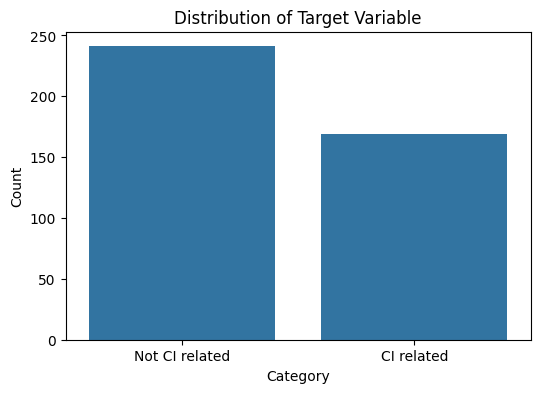

In [ ]:
# Create a bar chart of the target variable
plt.figure(figsize=(6, 4))
sns.barplot(x=['Not CI related', 'CI related'], y=df['Target'].value_counts())
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Distribution of Target Variable')
plt.show()

In [ ]:
df['Target'].value_counts(normalize=True) * 100

Target
0    58.780488
1    41.219512
Name: proportion, dtype: float64

## Split the data

In [ ]:
# Define the proportions for the train, validation, and test sets
train_size = 0.6
validation_size = 0.2
test_size = 0.2

# First, split the dataset into train and temp sets
train_df, temp_df = train_test_split(df, test_size=(1 - train_size), random_state=42)

# Then, split the temp set into validation and test sets
validation_df, test_df = train_test_split(temp_df, test_size=(test_size / (test_size + validation_size)), random_state=42)

# Display the sizes of the splits
print("Training set size:", len(train_df))
print("Validation set size:", len(validation_df))
print("Test set size:", len(test_df))

Training set size: 246
Validation set size: 82
Test set size: 82


In [ ]:
# Save the three data sets
train_df.to_csv('GitHub/climate_innovation_project/data/train_data.csv', index = False)
validation_df.to_csv('GitHub/climate_innovation_project/data/valication_data.csv', index = False)
test_df.to_csv('GitHub/climate_innovation_project/data/test_data.csv', index = False)

## Explore the training data

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 246 entries, 362 to 102
Data columns (total 17 columns):
 #   Column                                                Non-Null Count  Dtype 
---  ------                                                --------------  ----- 
 0   Index                                                 246 non-null    int64 
 1   CI related?                                           246 non-null    object
 2   Title                                                 246 non-null    object
 3   Abstract                                              246 non-null    object
 4   DOI                                                   246 non-null    object
 5   Scopus Source title                                   246 non-null    object
 6   All Science Journal Classification (ASJC) field name  246 non-null    object
 7   Quacquarelli Symonds (QS) Subject area field name     246 non-null    object
 8   Quacquarelli Symonds (QS) Subject field name          246 non-null    obj

In [ ]:
#Many SDGs are related to "climate", so we can explore this column a bit more

print("The number of publications NOT related to SDG: " + str((train_df['Sustainable Development Goals (2023)'] == '-').sum()))
print("The number of publications related to SDG: " + str((train_df['Sustainable Development Goals (2023)'] != '-').sum()))

The number of publications NOT related to SDG: 102
The number of publications related to SDG: 144


## Eastablish a baseline model

The baseline model is determined by the few SDGs that are related to "climate." If one of the selected SDG is related to the publication, we will consider the publication to be related to "climate innovation," and predict "Y", otherwise we will determine it as not related to "climate innovation" and predict "N."

In [ ]:
# Define the values in 'column1' that will predict 1 for the target variable
values_predicting_1 = ['SDG 7', 'SDG 11', 'SDG 13', 'SDG 12', 'SDG 14', 'SDG 15']

# Generate baseline predictions
train_df['baseline_prediction'] = train_df['Sustainable Development Goals (2023)'].apply(
    lambda x: 1 if any (value in x for value in  values_predicting_1)  else 0)

# Calculate metrics
accuracy = accuracy_score(train_df['Target'], train_df['baseline_prediction'])
precision = precision_score(train_df['Target'], train_df['baseline_prediction'])
recall = recall_score(train_df['Target'], train_df['baseline_prediction'])
f1 = f1_score(train_df['Target'], train_df['baseline_prediction'])

# Print the metrics
print("Metrics from the traing set: ")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Metrics from the traing set: 
Accuracy: 0.68
Precision: 0.58
Recall: 0.65
F1 Score: 0.61


In [ ]:
# Generate baseline predictions
validation_df['baseline_prediction'] = validation_df['Sustainable Development Goals (2023)'].apply(
    lambda x: 1 if any(value in x for value in values_predicting_1) else 0)

# Calculate metrics
accuracy = accuracy_score(validation_df['Target'], validation_df['baseline_prediction'])
precision = precision_score(validation_df['Target'], validation_df['baseline_prediction'])
recall = recall_score(validation_df['Target'], validation_df['baseline_prediction'])
f1 = f1_score(validation_df['Target'], validation_df['baseline_prediction'])

# Print the metrics
print("Metrics from the validation set: ")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Metrics from the validation set: 
Accuracy: 0.66
Precision: 0.54
Recall: 0.71
F1 Score: 0.61


We have a estabalished a baseline model and from here, we will explore a few models in order to improve the performace.